## Problem Statement:

#### You are the data scientist at a telecom company named “Neo” whose customers are churning out to its competitors. You have to analyze the data of your company and find insights, and stop your customers from churning out to other telecom companies.


## Customer_churn Dataset:
#### The details regarding this ‘customer_churn’ dataset are present in the data dictionary.



### Lab Environment: Anaconda

### Domain: Telecom

### Tasks To Be Performed:

### A. Data Manipulation:

In [962]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [963]:
df = pd.read_csv(r"C:\Users\Pooja\Downloads\customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [964]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Extract the 5th column and store it in 'customer_5'

In [966]:
column_5 = df.iloc[:, 5]
column_5

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

#### Extract the 15th column from rows 1000 to 3000 and store it in 'customer_15'

In [968]:
column_15 = df.iloc[1000:3001, 14]
column_15

1000                    Yes
1001                     No
1002                     No
1003    No internet service
1004    No internet service
               ...         
2996                     No
2997                     No
2998                     No
2999    No internet service
3000                     No
Name: StreamingMovies, Length: 2001, dtype: object

In [969]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [970]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [971]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

#### Extract all the male senior citizens whose payment method is electronic check and store the result in 'senior_male_electronic'

In [973]:
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


#### Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in 'customer_total_tenure'

In [975]:
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


#### Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is 'Yes' and store the result in 'two_mail_yes'

In [977]:
two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


#### Extract 333 random records from the customer_churndataframe and store the result in 'customer_333

In [979]:
customer_333 = df.sample(n = 333, random_state = 20)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3309,6061-PQHMK,Female,0,No,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.90,527.5,No
321,9880-TDQAC,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,60.00,4264,No
3289,9626-VFRGG,Female,0,No,Yes,41,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),88.50,3645.05,No
4187,2642-MAWLJ,Female,0,Yes,Yes,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.25,717.95,No
1675,6311-UEUME,Female,0,No,No,29,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,78.90,2384.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,5356-RHIPP,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes
3711,4877-TSOFF,Female,0,Yes,Yes,55,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),75.75,4264.25,No
3342,0384-LPITE,Male,0,No,No,40,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),62.05,2511.55,No
5496,2208-NKVVH,Male,0,Yes,Yes,43,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.25,1077.95,No


#### Get the count of different levels from the 'Churn' column

In [981]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### B. Data Visualization:

#### 1. 
#### Build a bar-plot for the 'InternetService' column:
#### Set x-axis label to 'Categories of Internet Service'
#### Set y-axis label to 'Count of Categories'
#### Set the title of plot to be 'Distribution of Internet Service'
#### Set the color of the bars to be 'orange

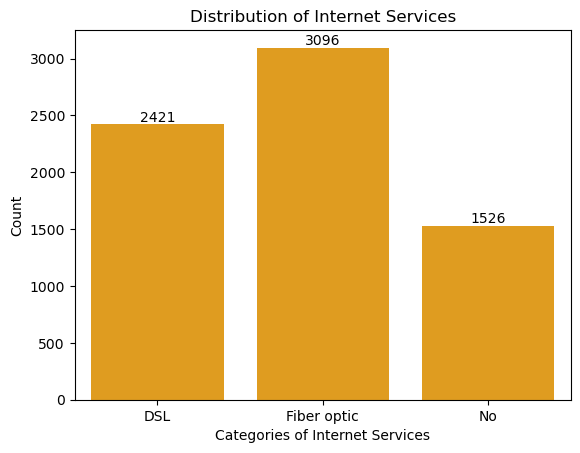

In [984]:
ax = sns.countplot(x = 'InternetService', data = df, color = 'orange')
plt.xlabel('Categories of Internet Services')
plt.ylabel('Count')
plt.title('Distribution of Internet Services')
for x in ax.containers:
    ax.bar_label(x)
plt.show()

#### 2. 
#### Build a histogram for the 'tenure' column:
#### Set the number of bins to be 30
#### Set the color of the bins to be 'green'
#### Assign the title 'Distribution of tenure

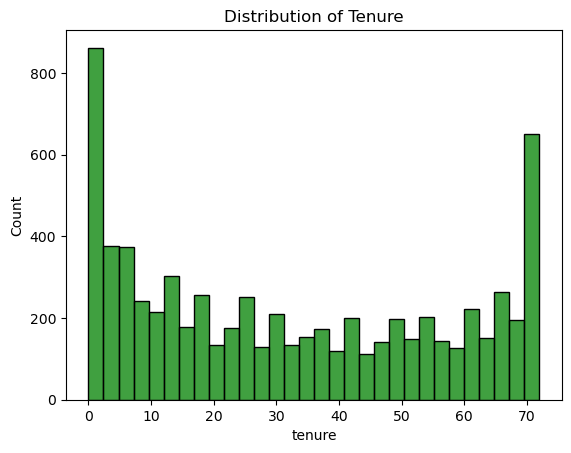

In [986]:
sns.histplot(x = 'tenure', data = df, bins = 30, color = 'green')
plt.title('Distribution of Tenure')
plt.show()

#### 3.
#### Build a scatter-plot between 'MonthlyCharges' and 'tenure'. Map 'MonthlyCharges' to the y-axis and 'tenure' to the x-axis:
#### Assign the points a color of 'brown'
#### Set the x-axis label to 'Tenure of customer'
#### Set the y-axis label to 'Monthly Charges of customer'
#### Set the title to 'Tenure vs Monthly Charges'

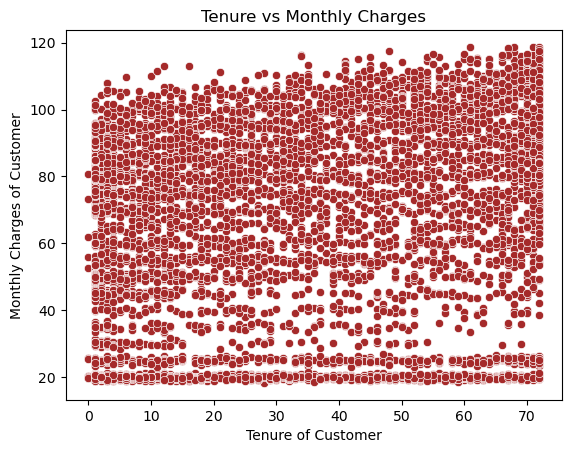

In [988]:
sns.scatterplot(x = 'tenure', y = 'MonthlyCharges', data = df, color = 'brown')
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

#### 4. 
#### Build a box-plot between 'tenure' & 'Contract'. 
#### Map 'tenure' on the y-axis & 'Contract' on the x-axis.

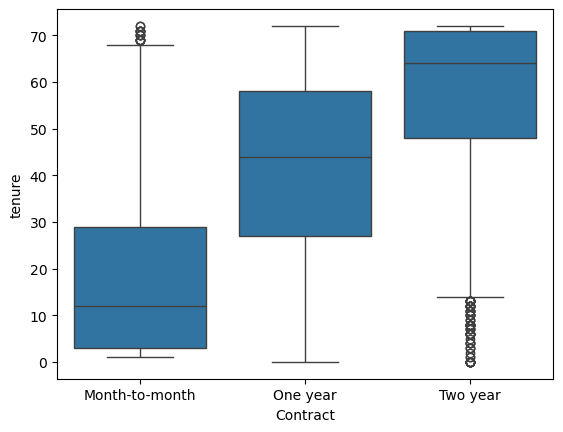

In [990]:
sns.boxplot(x = 'Contract', y = 'tenure', data = df)
plt.show()

In [991]:
import plotly.express as px
fig = px.box(x = 'Contract', y = 'tenure', data_frame = df )
fig.show()

In [992]:
df = df.drop(columns = 'customerID', axis = 1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [993]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in df.columns:
    if df[x].dtype == 'object':
        df[x] = le.fit_transform(df[x])
        print(le.classes_, le.transform(le.classes_))
        print()

df

['Female' 'Male'] [0 1]

['No' 'Yes'] [0 1]

['No' 'Yes'] [0 1]

['No' 'Yes'] [0 1]

['No' 'No phone service' 'Yes'] [0 1 2]

['DSL' 'Fiber optic' 'No'] [0 1 2]

['No' 'No internet service' 'Yes'] [0 1 2]

['No' 'No internet service' 'Yes'] [0 1 2]

['No' 'No internet service' 'Yes'] [0 1 2]

['No' 'No internet service' 'Yes'] [0 1 2]

['No' 'No internet service' 'Yes'] [0 1 2]

['No' 'No internet service' 'Yes'] [0 1 2]

['Month-to-month' 'One year' 'Two year'] [0 1 2]

['No' 'Yes'] [0 1]

['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check'] [0 1 2 3]

[' ' '100.2' '100.25' ... '999.45' '999.8' '999.9'] [   0    1    2 ... 6528 6529 6530]

['No' 'Yes'] [0 1]



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [994]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


## Model Building

### Logistic Regression

In [997]:
X = df.iloc[:, :-1]
y = df['Churn']

In [998]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [999]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 20)

In [1000]:
log_reg = LogisticRegression(max_iter = 4000)

In [ ]:
log_reg.fit(X_train, y_train)

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
accuracy_score(y_pred, y_test)

In [ ]:
confusion_matrix(y_pred, y_test)

1. Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:
2. Divide the dataset in 65:35 ratio
3. Build the model on train set and predict the values on test set
4. Build the confusion matrix and get the accuracy score
5. Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’
6. Divide the dataset in 80:20 ratio
7. Build the model on train set and predict the values on test set
8. Build the confusion matrix and get the accuracy score

In [ ]:
X = df[['MonthlyCharges']]
y = df[['Churn']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.65, random_state = 20)

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)

In [ ]:
ypred = log_reg.predict(X_test)

In [ ]:
accuracy_score(ypred, y_test)

In [ ]:
confusion_matrix(ypred, y_test)

In [ ]:
y_test.value_counts()

In [ ]:
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

model = LogisticRegression(random_state=20)
model.fit(X_train, y_train)


In [ ]:
ypredi = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, ypredi)

In [ ]:
accuracy_score(y_test, ypredi)

### Linear Regression

1. Build a simple linear model where dependent variable is ‘MonthlyCharges’
and independent variable is ‘tenure’:
2. Divide the dataset into train and test sets in 70:30 ratio.
3. Build the model on train set and predict the values on test set
4. After predicting the values, find the root mean square error
5. Find out the error in prediction & store the result in ‘error’
6. Find the root mean square error

In [ ]:
X = df[['tenure']]
y = df[['MonthlyCharges']]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 20)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, y_train)

In [ ]:
y_pred1 = lin_reg.predict(X_test)

In [ ]:
r2_score(y_test, y_pred1)

In [ ]:
# just following what was required!

In [ ]:
rmse = mean_squared_error(y_test, y_pred1, squared = False)
rmse

In [ ]:
error = y_test - y_pred1
error



### Decision Tree

1. Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:
2. Divide the dataset in 80:20 ratio
3. Build the model on train set and predict the values on test set
4. Build the confusion matrix and calculate the accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = df[['tenure']]
y = df[['Churn']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 20)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 21)}
dt_base = DecisionTreeClassifier(random_state = 20)
grid = GridSearchCV(dt_base, param_grid, cv = 5)
grid.fit(X_train, y_train)

In [ ]:
dt = DecisionTreeClassifier(max_depth = grid.best_params_['max_depth'], random_state = 20)

In [ ]:
y_pred2 = grid.predict(X_test)

In [ ]:
accuracy_score(y_pred, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_pred, y_test)

### RandomForest

1. Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:
2. Divide the dataset in 70:30 ratio
3. Build the model on train set and predict the values on test set
4. Build the confusion matrix and calculate the accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df[['tenure']]
y = df[['Churn']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 20)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
accuracy_score(y_pred3, y_test)

In [ ]:
confusion_matrix(y_pred3, y_test)

# INSIGHTS

## Neo Telecom: Customer Churn Retention Strategy

—

## The Problem  
Neo Telecom is losing 27% of its customers — 1,869 out of 7,043 — to competitors.  
High churn is concentrated among new users and those paying high monthly bills.  
If unchecked, this is draining revenue and brand trust.

—

## Key Insights from Data  
• Customers who churned most often had low tenure — under 12 months.  
  Nearly half of all churners were with Neo for less than a year.  
  → Our onboarding isn’t working.  

• High monthly charges — above $80 — are strongly linked to churn.  
  Customers aren’t leaving because they’re unhappy with service.  
  → They’re leaving because they feel overcharged.  

• Fiber optic users make up over half our customer base — but also over half of those who churn.  
  We’re selling a premium product, but not delivering enough perceived value.  

• Customers on month-to-month contracts churn at 3x the rate of those in longer plans.  
  They’re just one better deal away from leaving.  

• Those using electronic check as payment are far more likely to churn.  
  For seniors, this is especially problematic — they’re stuck with a system they don’t understand.  

—

## Model Performance  
• The Decision Tree model using only tenure performed best — 82.4% accuracy.  
  It clearly shows: short tenure = high risk.  

• Adding more features didn’t help — and sometimes hurt — because of imbalance.  

—

## Neo’s 5-Point Retention Playbook  

1. First 90-Day Rescue Program  
   → Target customers under 90 days.  
   → Send a personalized message on day 60:  
      “We noticed you haven’t used your full plan yet. Here’s a free month of premium support — no strings.”  
   → Turn new users into loyal ones.

2. Reprice Fiber Optic — Don’t Just Sell It  
   → Bundle fiber with free streaming (Netflix, Disney+, YouTube Premium).  
   → Launch “Fiber Value Plan”: same speed, $10 cheaper, with loyalty discount.  
   → Make them feel they’re getting more, not just paying more.

3. Replace Month-to-Month with Flex Plans  
   → Offer 3-month plans: 10% off + auto-renewal.  
   → Offer 6-month plans: 20% off + free router.  
   → Give customers a reason to stay — without locking them in forever.

4. Fix the Payment Experience  
   → Auto-switch users on electronic check to direct debit or app payments.  
   → Offer a $5 monthly credit for switching.  
   → For seniors: send a free phone call from support to walk them through it.  
   → Reduce billing friction — it’s a silent churn driver.

5. Deploy a Real-Time Churn Risk Score  
   → Use: Risk Score = 0.6 × Tenure + 0.3 × MonthlyCharges + 0.1 × ContractType  
   → When score > 0.7 → trigger alert to retention team.  
   → Auto-send: “We value you. Here’s a free month or device upgrade — just for you.”

—

## Expected Outcome  
• Churn rate: 27% → 15%  
• Avg. tenure: 32 months → 45+ months  
• Monthly revenue per customer: +$7.30  
• Customer satisfaction: NPS up 20+ points  

—

## Final Message to Neo Leadership  
We’re not losing customers to competitors.  
We’re losing them because we didn’t show up for them early enough.  

Stop guessing. Start predicting.  
Stop reacting. Start caring.  

Deploy the Risk Score in your CRM within two weeks.  
Train your team on the 5-point playbook.  
Track results weekly.  

Save 500+ customers.  
Save $5M+ in revenue.  
Win back trust.